<a href="https://colab.research.google.com/github/shubham-hub/Play-Store-Analysis/blob/main/Capstone_Project_1_Shubham_Chavhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

## **Mount Google Drive**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Getting data from CSV file using Pandas**


In [4]:
#Creating dataframes for both playstore data as well as user reviews data
df_play_store = pd.read_csv('/content/drive/MyDrive/Play_Store_Project/Play Store Data.csv')
df_user_review = pd.read_csv('/content/drive/MyDrive/Play_Store_Project/User Reviews.csv')

### We have two sets of data. One contains data of Play Store apps while the another dataset contains customer reviews of the android apps.We stored them in variables **'df_play_store'** and **'df_user_review'** respectively.


In [5]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up




1. ### Playstore dataset contains information on apps of different catagories with their ratings, size, number of installs, type and lot more like we normally see in our play store. Almost similar to data that are essential for success of any app.
2. ### From this we can come to a point that primary measure check success of any app is the number of installs.While factors affecting success like reviews, rating and other are important.

### **Let's check basic information of play store data for different apps**

In [6]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB



###Rating column contains mostly null values. Will have to deal with those and other columns too.

### **Let's handle duplicates present in dataset**

In [7]:
#this should be add 
#df_play_store = playstore_df.reset_index()

In [8]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
# Check for duplicate rows 
df_play_store[df_play_store.duplicated()].count()

App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64

In [10]:
df_play_store['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
HTC Sense Input-BG                                   1
Pick Your Part Garage                                1
Frequencies Free                                     1
Burrito Bash – We Bare Bears                         1
WIZARD Card Game                                     1
Name: App, Length: 9660, dtype: int64

### From the above value counts by app name, we can see there are duplicate rows for a some applications.
### Now checking if those rows for same app is identical or not.

In [11]:
# Checking if those rows for same app is identical or not
df_play_store[df_play_store['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


### From the above observation we can see there might be duplicate rows present for same app. For different category of same app there are different number of reviews. 

### Keeping the Highest number of review and discarding other rows.

In [12]:
df_play_store = df_play_store.sort_values('Reviews', ascending=False).drop_duplicates(['App', 'Category'])

In [13]:
df_play_store[df_play_store['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [14]:
# Check for duplicate rows
df_play_store[df_play_store.duplicated()].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
# The total number of apps
print('Total number of apps in the file = ', df_play_store['App'].count())

Total number of apps in the file =  9745


### **Let's handle missing/null values**

In [16]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 2989 to 4177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last Updated    9745 non-null   object 
 11  Current Ver     9737 non-null   object 
 12  Android Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


### Rating column has most null values but cannot remove them all. 
### We will drop the rows of current ver, android ver, content rating and type which contain null values.
### We have to handle null values of  rating.


In [41]:
# get null values count column wise
df_play_store.isnull().sum()

App                  0
Category             0
Rating            1459
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [21]:
# Drop the rows of current ver and android ver which contain null values.
df_play_store.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])

### Detecting outliers and then handling null values of rating coulmn.

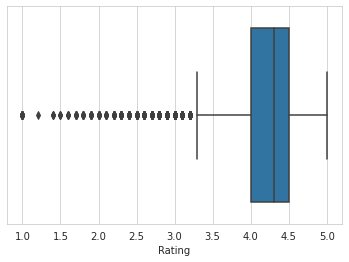

In [46]:
sns.boxplot(x='Rating',data=df_play_store)
plt.show()

### From boxplot there is no outliers in rating column.
### Replacing the null values of rating column with median.

In [47]:
def inpute_median(series):
  return series.fillna(series.median())

In [48]:
df_play_store.Rating = df_play_store['Rating'].transform(inpute_median)

In [49]:
# get null values count column wise
df_play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### **There are many numeric value columns that has Dtype object. Will change that to numeric.**

In [50]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9733 entries, 2989 to 4177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9733 non-null   object 
 1   Category        9733 non-null   object 
 2   Rating          9733 non-null   float64
 3   Reviews         9733 non-null   object 
 4   Size            9733 non-null   object 
 5   Installs        9733 non-null   object 
 6   Type            9733 non-null   object 
 7   Price           9733 non-null   object 
 8   Content Rating  9733 non-null   object 
 9   Genres          9733 non-null   object 
 10  Last Updated    9733 non-null   object 
 11  Current Ver     9733 non-null   object 
 12  Android Ver     9733 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


In [51]:
# For Install column.
df_play_store['Installs'].value_counts()

1,000,000+        1429
100,000+          1114
10,000+           1029
10,000,000+        959
1,000+             887
100+               709
5,000,000+         620
500,000+           509
50,000+            468
5,000+             467
10+                384
500+               328
50,000,000+        211
50+                204
100,000,000+       204
5+                  82
1+                  67
500,000,000+        27
1,000,000,000+      21
0+                  14
Name: Installs, dtype: int64

In [52]:
# There are  + symbol present so replacing those with lambda function
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))

# There are  , symbol present so replacing those with lambda function
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

# converting string to int type value
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: int(x))

In [54]:
#For Size column. 
df_play_store.Size.unique()

array(['31M', '91k', '18M', '33M', '22M', 'Varies with device', '5.5M',
       '10M', '3.7M', '38M', '96M', '15M', '97M', '2.9M', '2.8M', '3.9M',
       '49M', '3.2M', '75M', '9.4M', '19M', '71M', '13M', '6.6M', '1.1M',
       '63M', '2.7M', '39M', '51M', '74M', '99M', '27M', '40M', '59M',
       '4.5M', '37M', '55M', '16M', '70M', '7.2M', '73k', '2.0M', '6.3M',
       '3.4M', '9.7M', '9.9M', '720k', '14M', '7.9M', '45M', '20M',
       '6.7M', '1.3M', '87M', '8.9M', '2.6M', '598k', '3.5M', '1.9M',
       '23M', '3.6M', '26M', '30M', '5.1M', '53M', '9.0M', '93k', '4.1M',
       '28M', '25M', '2.5M', '3.8M', '1.5M', '12M', '54M', '1.0M', '79M',
       '5.8M', '82M', '4.7M', '58M', '7.6M', '61M', '7.0M', '64M', '3.1M',
       '118k', '696k', '44M', '411k', '1.2M', '17M', '60M', '57M', '43M',
       '21M', '11M', '9.3M', '6.5M', '3.0M', '1.7M', '6.1M', '387k',
       '8.7M', '9.2M', '35M', '7.3M', '5.4M', '5.0M', '98M', '5.6M',
       '5.7M', '924k', '1.6M', '36M', '2.4M', '383k', '8.6M', 

### In **Size column**  we can see that the size is not defined in single unit Both KB and MB are there. So we have to convert those to same unit (KB). 

### Also There are columns with Varies with device string. Will be giving zero for app size that varies with device. As size can't be zero so treated as variable size.

In [56]:
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('Varies with device', '0' ) if 'Varies with device' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(str(x).replace('M', '')) * 1024 if 'M' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('.', '') if 'M' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)

# converting all str values to float
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(x))

In [67]:
#function for Review column
def string_to_integer(string):
  return int(string)

In [68]:
df_play_store['Reviews'] = df_play_store['Reviews'].apply(string_to_integer)

In [70]:
#function for price (All prices are in $)
def string_to_float(string):
  if string=='0':
    return 0
  else:
    return float(string[1:])

In [71]:
df_play_store['Price']=df_play_store['Price'].apply(string_to_float)

In [72]:
df_play_store['Price'].describe()

count    9733.000000
mean        1.091610
std        16.788333
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### From Last Updated column taking year to make column of new year

In [80]:
def string_to_year(string):
  return int(string[-4:])

In [81]:
df_play_store['new_year']=df_play_store['Last Updated'].apply(string_to_year)
df_play_store['new_year'] = pd.to_datetime(df_play_store['new_year'], format='%Y')

In [82]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9733 entries, 2989 to 4177
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9733 non-null   object        
 1   Category        9733 non-null   object        
 2   Rating          9733 non-null   float64       
 3   Reviews         9733 non-null   int64         
 4   Size            9733 non-null   float64       
 5   Installs        9733 non-null   int64         
 6   Type            9733 non-null   object        
 7   Price           9733 non-null   float64       
 8   Content Rating  9733 non-null   object        
 9   Genres          9733 non-null   object        
 10  Last Updated    9733 non-null   object        
 11  Current Ver     9733 non-null   object        
 12  Android Ver     9733 non-null   object        
 13  updation_year   9733 non-null   datetime64[ns]
 14  new_year        9733 non-null   datetime64[ns]
dtypes